<a href="https://colab.research.google.com/github/sodaianee/Projeto_saude/blob/main/Projeto_Final_Grupo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Escola: SoulCode Academy

Curso: Analista de Dados e Dashboard

Assunto: Projeto Final - Grupo 3 - Saúde

Professora: Franciane Rodrigues

Aluno (a): Daiane Oliveira, Filipe Cayres, Leonardo Silveira, Luciana Silveira, Matheus Belisário, Luana Reis.

# **Dicionário de Dados**


Sobre esses Arquivo:

Dataset Columns:

* Person ID: um identificador para cada indivíduo.
* Gender: O sexo da pessoa (Masculino/Feminino).
* Age: A idade da pessoa em anos.
* Occupation: A ocupação ou profissão da pessoa.
* Sleep Duration (hours): O número de horas que a pessoa dorme por dia.
* Quality of Sleep (scale: 1-10): Avaliação subjetiva da qualidade do sono, variando de 1 a 10.
* Physical Activity Level (minutes/day): O número de minutos que a pessoa pratica atividade física diariamente.
* Stress Level (scale: 1-10): Avaliação subjetiva do nível de estresse vivenciado pela pessoa, variando de 1 a 10.
* BMI Category: A categoria de IMC da pessoa (por exemplo, Baixo peso, Normal, Sobrepeso).
* Blood Pressure (systolic/diastolic): A medida da pressão arterial da pessoa, indicada como pressão sistólica sobre a pressão diastólica.
* Heart Rate (bpm): A frequência cardíaca de repouso da pessoa em batimentos por minuto.
* Daily Steps: O número de passos que a pessoa dá por dia.
* Sleep Disorder: A presença ou ausência de um distúrbio do sono na pessoa (Nenhum, Insônia, Apneia do Sono).


Acesso:
https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data

# **Abertura e Extração dos Dados**

In [ ]:
# Comando de abertura para google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Instalação de pacote
!pip install gcsfs

In [ ]:
# Importando bibliotecas
import os
import pandas as pd
from google.cloud import storage

In [ ]:
# CONFIGURANDO DA CHAVE DE SEGURANCA - ACESSO O PROJETO
serviceAccount = '/content/drive/MyDrive/chaves/aulachave-9a797292d224.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
# Configurações Google Cloud Storage - ACESSO AO BUCKET
client = storage.Client()                                                  # Autenticação do cliente
bucket = client.get_bucket('sono_bruto')                                # nome do bucket
bucket.blob('sono.csv')                                           # nome do arquivo
path = 'gs://sono_bruto/sono_brutos/sono.csv'

In [ ]:
# Configuração da quantidade de colunas para aparecer em um dataframe
pd.set_option('display.max_columns', 100)

In [ ]:
#Abertura da base de dados
df = pd.read_csv(path)

In [ ]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


# **Pré-Análise**

In [ ]:
# Visualização do dataframe
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
# Visualização do cabeçalho
df.head(1)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN


In [ ]:
# Visualização do dataframe de forma aleatoria
df.sample(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
296,297,Female,50,Nurse,6.1,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
23,24,Male,30,Doctor,7.7,7,75,6,Normal,120/80,70,8000,NaN
345,346,Female,57,Nurse,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
95,96,Female,36,Accountant,7.1,8,60,4,Normal,115/75,68,7000,NaN
183,184,Male,42,Lawyer,7.8,8,90,5,Normal,130/85,70,8000,NaN


In [ ]:
# Verificando o tamanho do dataframe
df.shape

(374, 13)

In [ ]:
# Verificando os tipos de dados de cada coluna
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [ ]:
# Vamos contar quantas observações nós temos em casa coluna
df.count()

Person ID                  374
Gender                     374
Age                        374
Occupation                 374
Sleep Duration             374
Quality of Sleep           374
Physical Activity Level    374
Stress Level               374
BMI Category               374
Blood Pressure             374
Heart Rate                 374
Daily Steps                374
Sleep Disorder             155
dtype: int64

In [ ]:
# Informações detalhadas do conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


# **Alterando nomes das colunas**

In [ ]:
# Criar um dicionário de mapeamento com os nomes novos e antigos das colunas
new_column_names = { 'Person ID' : 'ID',
    'Gender': 'Genero',
    'Age': 'Idade',
    'Occupation' : 'Ocupação',
    'Sleep Duration': 'Duração do sono',
    'Quality of Sleep': 'Qualidade do Sono',
    'Physical Activity Level': 'Nível de Atividade Física',
    'Stress Level': 'Nível de Estresse',
    'BMI Category': 'Categoria IMC',
    'Blood Pressure': 'Tensão arterial',
    'Heart Rate': 'Frequência Cardíaca',
    'Daily Steps': 'Passos Diários',
    'Sleep Disorder': 'Distúrbio do Sono'
}
# Renomear as colunas usando o método 'rename'
df = df.rename(columns=new_column_names)

# Mostrar o DataFrame com os novos nomes das colunas
df

,ID,Genero,Idade,Ocupação,Duração do sono,Qualidade do Sono,Nível de Atividade Física,Nível de Estresse,Categoria IMC,Tensão arterial,Frequência Cardíaca,Passos Diários,Distúrbio do Sono
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
# Converter os valores da coluna 'Genero' para maiúsculas
df['Genero'] = df['Genero'].str.upper()

# Converter os valores da coluna 'Ocupação' para maiúsculas
df['Ocupação'] = df['Ocupação'].str.upper()

# Converter os valores da coluna 'Categoria IMC' para maiúsculas
df['Categoria IMC'] = df['Categoria IMC'].str.upper()

# Converter os valores da coluna 'Distúrbio do Sono' para maiúsculas
df['Distúrbio do Sono'] = df['Distúrbio do Sono'].str.upper()

In [ ]:
df

,ID,Genero,Idade,Ocupação,Duração do sono,Qualidade do Sono,Nível de Atividade Física,Nível de Estresse,Categoria IMC,Tensão arterial,Frequência Cardíaca,Passos Diários,Distúrbio do Sono
0,1,MALE,27,SOFTWARE ENGINEER,6.1,6,42,6,OVERWEIGHT,126/83,77,4200,NaN
1,2,MALE,28,DOCTOR,6.2,6,60,8,NORMAL,125/80,75,10000,NaN
2,3,MALE,28,DOCTOR,6.2,6,60,8,NORMAL,125/80,75,10000,NaN
3,4,MALE,28,SALES REPRESENTATIVE,5.9,4,30,8,OBESE,140/90,85,3000,SLEEP APNEA
4,5,MALE,28,SALES REPRESENTATIVE,5.9,4,30,8,OBESE,140/90,85,3000,SLEEP APNEA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,FEMALE,59,NURSE,8.1,9,75,3,OVERWEIGHT,140/95,68,7000,SLEEP APNEA
370,371,FEMALE,59,NURSE,8.0,9,75,3,OVERWEIGHT,140/95,68,7000,SLEEP APNEA
371,372,FEMALE,59,NURSE,8.1,9,75,3,OVERWEIGHT,140/95,68,7000,SLEEP APNEA
372,373,FEMALE,59,NURSE,8.1,9,75,3,OVERWEIGHT,140/95,68,7000,SLEEP APNEA


In [ ]:
df.dtypes

ID                             int64
Genero                        object
Idade                          int64
Ocupação                      object
Duração do sono              float64
Qualidade do Sono              int64
Nível de Atividade Física      int64
Nível de Estresse              int64
Categoria IMC                 object
Tensão arterial               object
Frequência Cardíaca            int64
Passos Diários                 int64
Distúrbio do Sono             object
dtype: object

### **Traduzindo Colunas**

In [ ]:
#Verificando as informações que preenche a coluna Ocupação = para traduções
sorted(pd.unique(df['Ocupação']))

['ACCOUNTANT',
 'DOCTOR',
 'ENGINEER',
 'LAWYER',
 'MANAGER',
 'NURSE',
 'SALES REPRESENTATIVE',
 'SALESPERSON',
 'SCIENTIST',
 'SOFTWARE ENGINEER',
 'TEACHER']

In [ ]:
traduzindo = { 'ACCOUNTANT' :'CONTADOR',
              'DOCTOR' : 'DOUTOR',
              'ENGINEER' : 'ENGENHEIRO',
               'LAWYER' : 'ADVOGADO',
               'MANAGER' : 'GERENTE',
               'NURSE' : 'ENFERMEIRO',
               'SALES REPRESENTATIVE' : 'REPRESENTANTE DE VENDAS',
                'SALESPERSON': 'VENDEDOR',
               'SCIENTIST': 'CIENTISTA',
               'SOFTWARE ENGINEER' : 'ENGENHEIRO DE SOFTWARE',
                'TEACHER': 'PROFESSOR'
}

In [ ]:
# Substituir os valores na coluna - 'Ocupação'
df['Ocupação']= df['Ocupação'].replace(traduzindo)

In [ ]:
#Verificando as informações que preenche a coluna Genero = para traduções
sorted(pd.unique(df['Genero']))

['FEMALE', 'MALE']

In [ ]:
traducao = { 'FEMALE' : 'FEMININO',
            'MALE': 'MASCULINO'
}
df['Genero']= df['Genero'].replace(traducao)

In [ ]:
#Verificando as informações que preenche a coluna Categoria IMC = para traduções
sorted(pd.unique(df['Categoria IMC']))

['NORMAL', 'NORMAL WEIGHT', 'OBESE', 'OVERWEIGHT']

In [ ]:
traducao1 = { 'NORMAL' : 'NORMAL',
            'NORMAL WEIGHT': 'NORMAL',
             'OBESE' : 'OBESO',
              'OVERWEIGHT': 'SOBREPESO'
}
df['Categoria IMC']= df['Categoria IMC'].replace(traducao1)

In [ ]:
df

,ID,Genero,Idade,Ocupação,Duração do sono,Qualidade do Sono,Nível de Atividade Física,Nível de Estresse,Categoria IMC,Tensão arterial,Frequência Cardíaca,Passos Diários,Distúrbio do Sono
0,1,MASCULINO,27,ENGENHEIRO DE SOFTWARE,6.1,6,42,6,SOBREPESO,126/83,77,4200,NaN
1,2,MASCULINO,28,DOUTOR,6.2,6,60,8,NORMAL,125/80,75,10000,NaN
2,3,MASCULINO,28,DOUTOR,6.2,6,60,8,NORMAL,125/80,75,10000,NaN
3,4,MASCULINO,28,REPRESENTANTE DE VENDAS,5.9,4,30,8,OBESO,140/90,85,3000,SLEEP APNEA
4,5,MASCULINO,28,REPRESENTANTE DE VENDAS,5.9,4,30,8,OBESO,140/90,85,3000,SLEEP APNEA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,FEMININO,59,ENFERMEIRO,8.1,9,75,3,SOBREPESO,140/95,68,7000,SLEEP APNEA
370,371,FEMININO,59,ENFERMEIRO,8.0,9,75,3,SOBREPESO,140/95,68,7000,SLEEP APNEA
371,372,FEMININO,59,ENFERMEIRO,8.1,9,75,3,SOBREPESO,140/95,68,7000,SLEEP APNEA
372,373,FEMININO,59,ENFERMEIRO,8.1,9,75,3,SOBREPESO,140/95,68,7000,SLEEP APNEA


In [ ]:
#Verificando as informações que preenche a coluna disturbio do sono = para traduções
#sorted(pd.unique(df['Distúrbio do Sono']))

# **Valores Nulos**

In [ ]:
# Verificando valores nulos
df.isnull().sum()

ID                             0
Genero                         0
Idade                          0
Ocupação                       0
Duração do sono                0
Qualidade do Sono              0
Nível de Atividade Física      0
Nível de Estresse              0
Categoria IMC                  0
Tensão arterial                0
Frequência Cardíaca            0
Passos Diários                 0
Distúrbio do Sono            219
dtype: int64

In [ ]:
# Substituir valores nulos com um valor fixo (exemplo: 0)
df.fillna('NÃO INFORMADO', inplace=True)

In [ ]:
#Verificando as informações que preenche a coluna Distúrbio do Sono = para traduções
sorted(pd.unique(df['Distúrbio do Sono']))

['INSOMNIA', 'NÃO INFORMADO', 'SLEEP APNEA']

In [ ]:
##Observação: a informação que estava nulo foi substituido o nome para 'não informado' e
#para melhorar a organização na tradução foi adicionado no nome 'NÃO INFORMADO'

traducao2 = { 'INSOMNIA' : 'INSÔNIA',
             'SLEEP APNEA': 'APNÉIA DO SONO',
            'NÃO INFORMADO' : 'NÃO INFORMADO',
}
df['Distúrbio do Sono']= df['Distúrbio do Sono'].replace(traducao2)

In [ ]:
df

,ID,Genero,Idade,Ocupação,Duração do sono,Qualidade do Sono,Nível de Atividade Física,Nível de Estresse,Categoria IMC,Tensão arterial,Frequência Cardíaca,Passos Diários,Distúrbio do Sono
0,1,MASCULINO,27,ENGENHEIRO DE SOFTWARE,6.1,6,42,6,SOBREPESO,126/83,77,4200,NÃO INFORMADO
1,2,MASCULINO,28,DOUTOR,6.2,6,60,8,NORMAL,125/80,75,10000,NÃO INFORMADO
2,3,MASCULINO,28,DOUTOR,6.2,6,60,8,NORMAL,125/80,75,10000,NÃO INFORMADO
3,4,MASCULINO,28,REPRESENTANTE DE VENDAS,5.9,4,30,8,OBESO,140/90,85,3000,APNÉIA DO SONO
4,5,MASCULINO,28,REPRESENTANTE DE VENDAS,5.9,4,30,8,OBESO,140/90,85,3000,APNÉIA DO SONO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,FEMININO,59,ENFERMEIRO,8.1,9,75,3,SOBREPESO,140/95,68,7000,APNÉIA DO SONO
370,371,FEMININO,59,ENFERMEIRO,8.0,9,75,3,SOBREPESO,140/95,68,7000,APNÉIA DO SONO
371,372,FEMININO,59,ENFERMEIRO,8.1,9,75,3,SOBREPESO,140/95,68,7000,APNÉIA DO SONO
372,373,FEMININO,59,ENFERMEIRO,8.1,9,75,3,SOBREPESO,140/95,68,7000,APNÉIA DO SONO


In [ ]:
# Verificando valores nulos
df.isnull().sum()

ID                           0
Genero                       0
Idade                        0
Ocupação                     0
Duração do sono              0
Qualidade do Sono            0
Nível de Atividade Física    0
Nível de Estresse            0
Categoria IMC                0
Tensão arterial              0
Frequência Cardíaca          0
Passos Diários               0
Distúrbio do Sono            0
dtype: int64

In [ ]:
# checagem
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         374 non-null    int64  
 1   Genero                     374 non-null    object 
 2   Idade                      374 non-null    int64  
 3   Ocupação                   374 non-null    object 
 4   Duração do sono            374 non-null    float64
 5   Qualidade do Sono          374 non-null    int64  
 6   Nível de Atividade Física  374 non-null    int64  
 7   Nível de Estresse          374 non-null    int64  
 8   Categoria IMC              374 non-null    object 
 9   Tensão arterial            374 non-null    object 
 10  Frequência Cardíaca        374 non-null    int64  
 11  Passos Diários             374 non-null    int64  
 12  Distúrbio do Sono          374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 3

# **Verificando Duplicidade**

In [ ]:
#VERIFICANDO SE TEM 'ID' DUPLICADO, COMO O VALOR É TRUE, NÃO TEMOS COLUNAS DUPLICADAS
df.ID.is_unique

True

In [ ]:
# Encontrar linhas duplicadas com base na coluna id organizado
duplicidade = df[df.duplicated(subset='ID', keep=False)]

# **Verificando Inconsistência**

In [ ]:
for column in df.columns:
    # Verificando se a coluna contém valores inteiros
    if df[column].dtype == 'int':
        print(f"Valores inteiros únicos na coluna '{column}':")
        print(sorted(df[column].unique()))
        print("-" * 50)  # Linha de separação

    # Verificando se a coluna contém valores de ponto flutuante
    elif df[column].dtype == 'float':
        print(f"Valores decimais únicos na coluna '{column}':")
        print(sorted(df[column].unique()))
        print("-" * 50)
    # Verificando se a coluna contém valores de texto (string)
    elif df[column].dtype == 'object':
        print(f"Valores de texto únicos na coluna '{column}':")
        print(sorted(df[column].unique()))
        print("-" * 50)  # Linha de separação

Valores inteiros únicos na coluna 'ID':
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 21

# **Integridade dos Dados**

In [ ]:
# Instalação do pacote pandera
!pip install pandera

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.9/251.9 kB 3.6 MB/s eta 0:00:00


In [ ]:
# importando o pacote pandera
import pandera as pa

In [ ]:
# verificar tipos e colunas de dados
df.dtypes

ID                             int64
Genero                        object
Idade                          int64
Ocupação                      object
Duração do sono              float64
Qualidade do Sono              int64
Nível de Atividade Física      int64
Nível de Estresse              int64
Categoria IMC                 object
Tensão arterial               object
Frequência Cardíaca            int64
Passos Diários                 int64
Distúrbio do Sono             object
dtype: object

In [ ]:
# Definição do esquema de validação
schema = pa.DataFrameSchema({'ID': pa.Column(pa.Int),
                             'Genero': pa.Column(pa.String),
                              'Idade': pa.Column(pa.Int),
                              'Ocupação': pa.Column(pa.String),
                              'Duração do sono': pa.Column(pa.Float),
                              'Qualidade do Sono':  pa.Column(pa.Int),
                              'Nível de Atividade Física': pa.Column(pa.Int),
                              'Nível de Estresse': pa.Column(pa.Int),
                              'Categoria IMC': pa.Column(pa.String),
                              'Tensão arterial': pa.Column(pa.String),
                              'Frequência Cardíaca': pa.Column(pa.Int),
                              'Passos Diários': pa.Column(pa.Int),
                              'Distúrbio do Sono':  pa.Column(pa.String)
})

In [ ]:
# Validar o DataFrame
schema.validate(df)

,ID,Genero,Idade,Ocupação,Duração do sono,Qualidade do Sono,Nível de Atividade Física,Nível de Estresse,Categoria IMC,Tensão arterial,Frequência Cardíaca,Passos Diários,Distúrbio do Sono
0,1,MASCULINO,27,ENGENHEIRO DE SOFTWARE,6.1,6,42,6,SOBREPESO,126/83,77,4200,NÃO INFORMADO
1,2,MASCULINO,28,DOUTOR,6.2,6,60,8,NORMAL,125/80,75,10000,NÃO INFORMADO
2,3,MASCULINO,28,DOUTOR,6.2,6,60,8,NORMAL,125/80,75,10000,NÃO INFORMADO
3,4,MASCULINO,28,REPRESENTANTE DE VENDAS,5.9,4,30,8,OBESO,140/90,85,3000,APNÉIA DO SONO
4,5,MASCULINO,28,REPRESENTANTE DE VENDAS,5.9,4,30,8,OBESO,140/90,85,3000,APNÉIA DO SONO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,FEMININO,59,ENFERMEIRO,8.1,9,75,3,SOBREPESO,140/95,68,7000,APNÉIA DO SONO
370,371,FEMININO,59,ENFERMEIRO,8.0,9,75,3,SOBREPESO,140/95,68,7000,APNÉIA DO SONO
371,372,FEMININO,59,ENFERMEIRO,8.1,9,75,3,SOBREPESO,140/95,68,7000,APNÉIA DO SONO
372,373,FEMININO,59,ENFERMEIRO,8.1,9,75,3,SOBREPESO,140/95,68,7000,APNÉIA DO SONO


In [ ]:
#Exportação a pasta do Google Drive
df.to_csv('/content/drive/MyDrive/dados_saude/saude_tratado.csv')

In [ ]:
#Verificação de arquivos (na saída de código tem que dar zero)
doc_count = collection.count_documents({})
print(doc_count)

NameError: name 'collection' is not defined

# **Carregamento GCP**

In [ ]:
# Fase de Carregamento no Bucket - copie link Gsutil Uri e troque para tratado
df.to_csv('gs://sono_bruto/sono_tratado/saude_tratado.csv', index=True)

# **Carregamento BigQuery**

In [ ]:
# Importando a biblioteca cliente do Google BigQuery em um ambiente Python
from google.cloud import bigquery
import pandas as pd
import pandas_gbq

In [ ]:
# Informando o nome do projeto
project_id = 'aulachave'
client = bigquery.Client(project=project_id)

In [ ]:
# Coloque o caminho da tabela do Bigquery onde você carregará seus dados
table_id =  'aulachave.projetosaude.pjsaude'

In [ ]:
# Carregando dados na Bigquery
pandas_gbq.to_gbq(df, table_id, project_id=project_id)

100%|██████████| 1/1 [00:00<00:00, 6442.86it/s]


# **Gráficos**

In [ ]:
df

,ID,Genero,Idade,Ocupação,Duração do sono,Qualidade do Sono,Nível de Atividade Física,Nível de Estresse,Categoria IMC,Tensão arterial,Frequência Cardíaca,Passos Diários,Distúrbio do Sono
0,1,MASCULINO,27,ENGENHEIRO DE SOFTWARE,6.1,6,42,6,SOBREPESO,126/83,77,4200,NÃO INFORMADO
1,2,MASCULINO,28,DOUTOR,6.2,6,60,8,NORMAL,125/80,75,10000,NÃO INFORMADO
2,3,MASCULINO,28,DOUTOR,6.2,6,60,8,NORMAL,125/80,75,10000,NÃO INFORMADO
3,4,MASCULINO,28,REPRESENTANTE DE VENDAS,5.9,4,30,8,OBESO,140/90,85,3000,APNÉIA DO SONO
4,5,MASCULINO,28,REPRESENTANTE DE VENDAS,5.9,4,30,8,OBESO,140/90,85,3000,APNÉIA DO SONO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,FEMININO,59,ENFERMEIRO,8.1,9,75,3,SOBREPESO,140/95,68,7000,APNÉIA DO SONO
370,371,FEMININO,59,ENFERMEIRO,8.0,9,75,3,SOBREPESO,140/95,68,7000,APNÉIA DO SONO
371,372,FEMININO,59,ENFERMEIRO,8.1,9,75,3,SOBREPESO,140/95,68,7000,APNÉIA DO SONO
372,373,FEMININO,59,ENFERMEIRO,8.1,9,75,3,SOBREPESO,140/95,68,7000,APNÉIA DO SONO


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

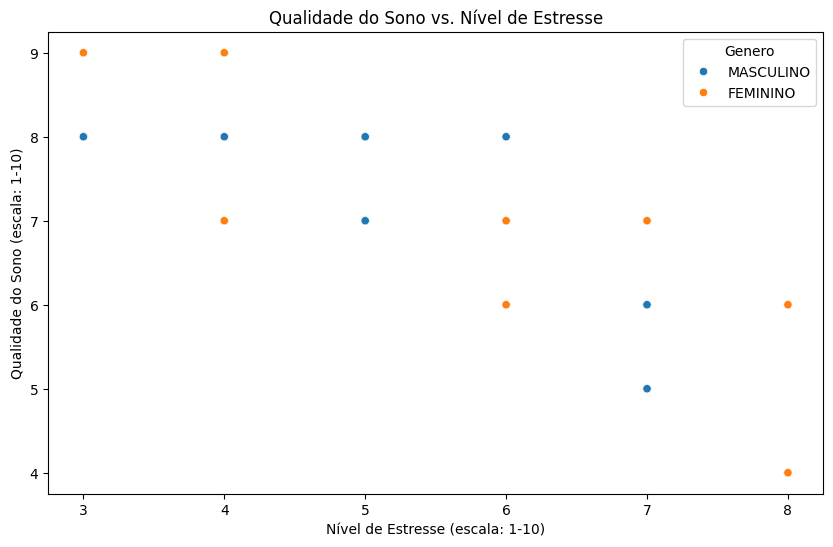

In [ ]:
# Criar um gráfico de dispersão da Qualidade do Sono vs. Nível de Estresse
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Nível de Estresse',
                y='Qualidade do Sono',
                hue='Genero', data=df)
plt.title('Qualidade do Sono vs. Nível de Estresse')
plt.xlabel('Nível de Estresse (escala: 1-10)')
plt.ylabel('Qualidade do Sono (escala: 1-10)')
plt.show()

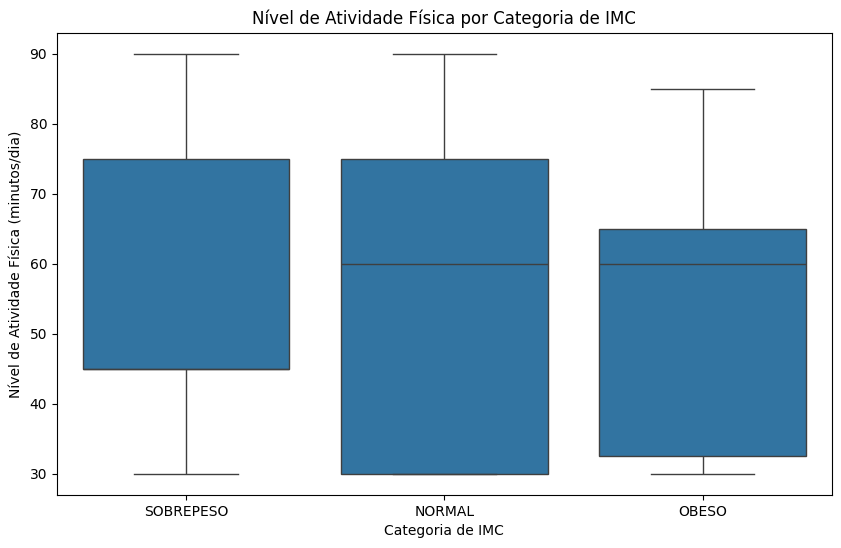

In [ ]:
# Criar um gráfico de caixas do Nível de Atividade Física por Categoria de IMC
plt.figure(figsize=(10, 6))
sns.boxplot(x='Categoria IMC', y='Nível de Atividade Física', data=df)
plt.title('Nível de Atividade Física por Categoria de IMC')
plt.xlabel('Categoria de IMC')
plt.ylabel('Nível de Atividade Física (minutos/dia)')
plt.show()